## kosarak

EOF
Execution time:  73.132 seconds.
Top-1024 in SS[1024]
Precision:  0.144
Top_dict with 160040 bytes.
Find:147
Top_ARE: 6.4335
Top_AAE: 448.3265
Estimate time:  0.865 seconds.


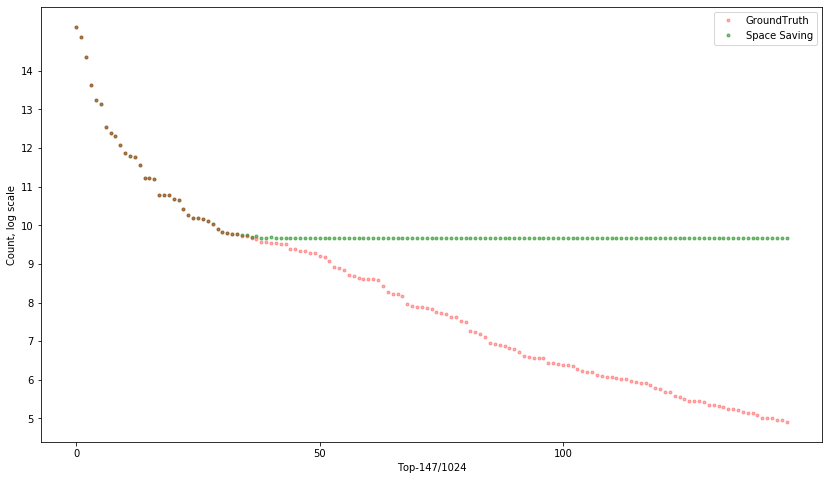

'\n# display memory usage\nTF.display_top(snapshot)\n'

In [41]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS

import time
import os
from pympler import asizeof

'''
TF.tracemalloc.start()
    # start track memory usage===========================================================
'''
    

filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth
    
size=1024
    # size of T
topk=1024
    # number of top-k
w=0
d=0
TC.Set_default(w,d,size,topk)
Top_dict=dict()

#item_count=100
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        #item_count-=1
        if not e:
            print('EOF')
            break
        else:
            item=DS.Tail(e,1)
            #item_count-=1
            # print("read {}th element: {}".format(item_count,element))
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    min_ele = min(Top_dict, key=Top_dict.get)
                        # find e_min
                    Top_dict[item.ID]=Top_dict[min_ele]+1
                        # update c_min
                    Top_dict.pop(min_ele)
                        # pop old min out
end=time.time()

'''
snapshot = TF.tracemalloc.take_snapshot()
top_stats = snapshot.statistics('lineno')
    # stop track memory usage===========================================================
'''

Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Top-{} in SS[{}]".format(TC.topk,TC.size))
print("Precision: {:6.3f}".format(precision))

# memory usage
print("Top_dict with {} bytes.".format(asizeof.asizeof(Top_dict)))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')


In [44]:
# result to csv
import pandas as pd

path=r"..\..\result"
 
filename='SS_Top_'+str(size)+'_kosarak'+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df.to_csv(os.path.join(path,filename),index=False)
df

,Element,Count
0,3,36133
1,6,30225
2,6 3,21139
3,11 6,12769
4,1,9766
...,...,...
1019,11 6 5510 3 13035 563,815
1020,490 1 6 294 3,815
1021,27 1489 6 7 2800 9935 2885 276 4504 17745 6909...,815
1022,11 1 3 30346,815


# Caida

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time:1040.346 seconds.
Top-1024 in SS[1024]
Precision:  0.258
Top_dict with 166984 bytes.
Find:264
Top_ARE: 2.4757
Top_AAE: 14757.6515
Estimate time:  1.030 seconds.


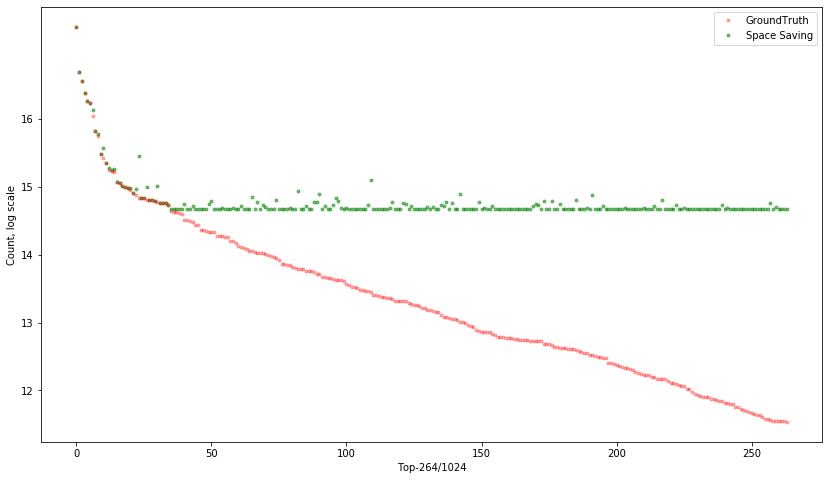

In [30]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=0
d=0
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()

#item_count=100
# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=str(file.read(13))
            if len(e)<13:
                print('EOF')
                break
            else:
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Top-{} in SS[{}]".format(TC.topk,TC.size))
print("Precision: {:6.3f}".format(precision))

# memory usage
print("Top_dict with {} bytes.".format(asizeof.asizeof(Top_dict)))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')


In [40]:
# result to csv
import pandas as pd

path=r"..\..\result"
 
filename='SS_'+str(size)+'_caida'+'.csv'
df=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
df.to_csv(os.path.join(path,filename),index=False)
df

,Element,Count
0,b'\xd2\x1d9\xfa\x00P\x0f\x13I\x9a\xf89\x06',168765
1,b'\xb7\xf6h\xd0\xc1\x8b+\xfc\xe1\x08\x00P\x06',106089
2,b'E.\x1c)\xa4\xb2\x89\xb6\x06\xba\xd2\xad\x06',96390
3,b'V+x\xe8\x00Po\xcd\xe4\xde\xccw\x06',85947
4,b'\x01l|\xff\x8f\r\x01l\xc5\xc8\x01\xbb\x06',78822
...,...,...
1019,b'o\xfe\xa2\xd1\xea*\xd2l%$\x00P\x06',26032
1020,b'w\xe2\x10\x84\x8e\x8f\x01`\xa7\xda\x01\xbb\x06',26032
1021,"b'c\x9e,\xb5\xf5S\x01-\xfe\x16\x1f\xa4\x06'",26032
1022,b'q\xafyP\xd8\x08\x03\xf9\x033\x10\x94\x06',26032


# Webdocs

In [ ]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import time
import os

from pympler import asizeof
import re

# =============================dataset path and file=============================
filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=0
d=0
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Top_dict=dict()


# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:
                item=DS.Tail(e,1)
                #item_count-=1
                # print("read {}th element: {}".format(item_count,element))
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        min_ele = min(Top_dict, key=Top_dict.get)
                            # find e_min
                        Top_dict[item.ID]=Top_dict[min_ele]+1
                            # update c_min
                        Top_dict.pop(min_ele)
                            # pop old min out
end=time.time()

# =============================Print and Plot result=============================
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Top-{} in SS[{}]".format(TC.topk,TC.size))
print("Precision: {:6.3f}".format(precision))

# memory usage
print("Top_dict with {} bytes.".format(asizeof.asizeof(Top_dict)))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

TF.Plot_topk_compare(gr_path,Top_dict,'Space Saving')
